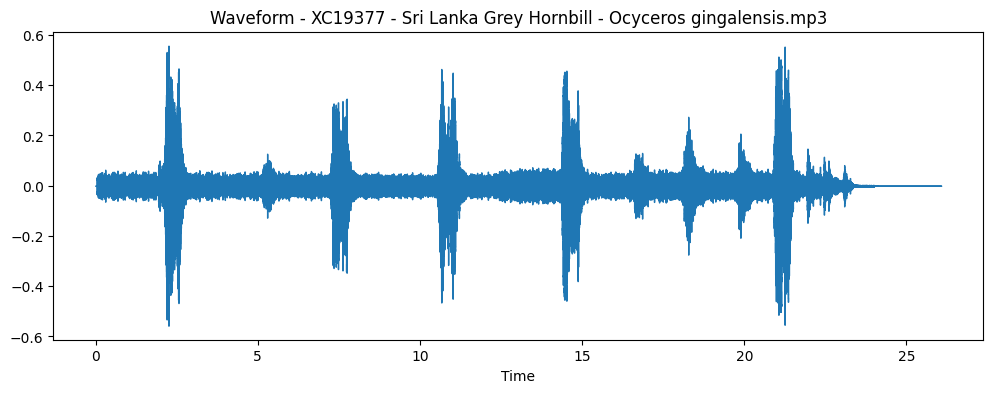

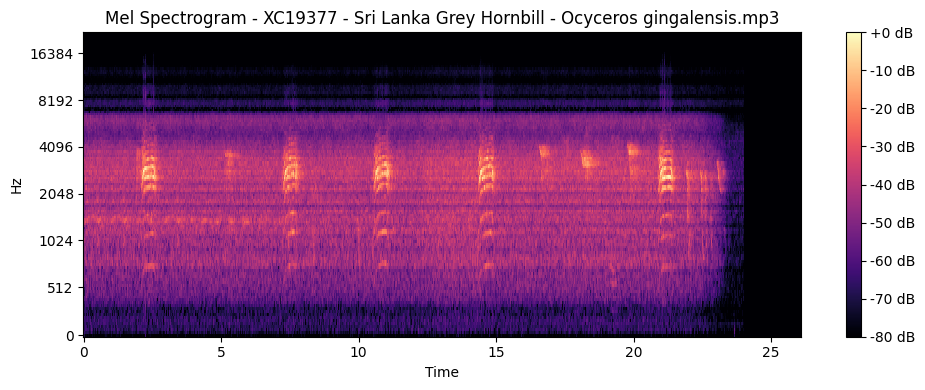

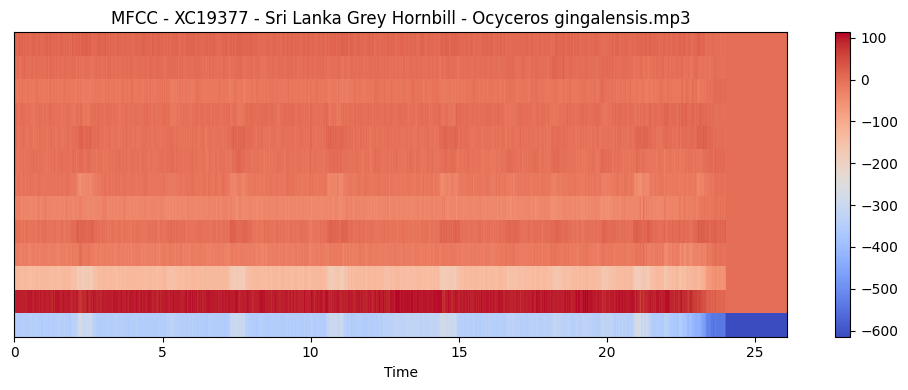

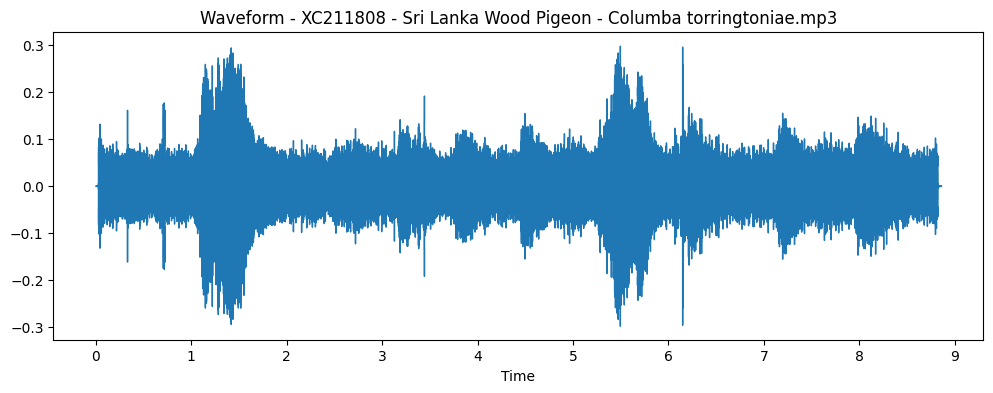

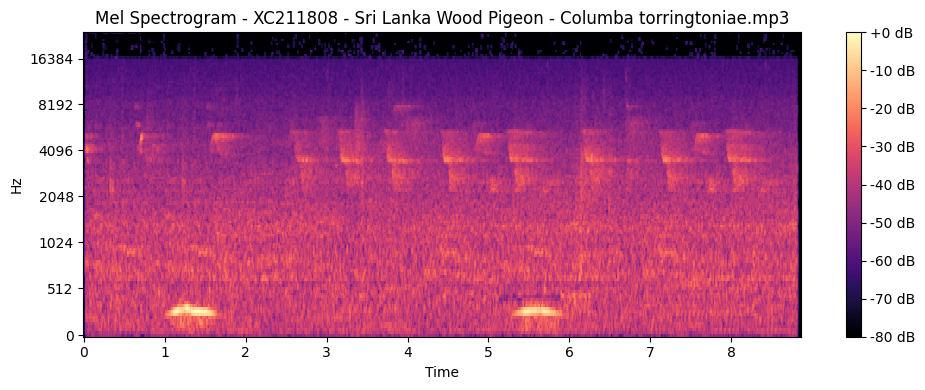

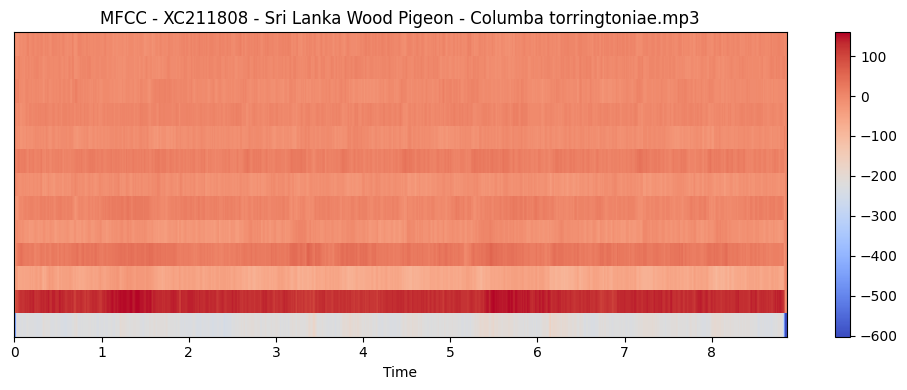

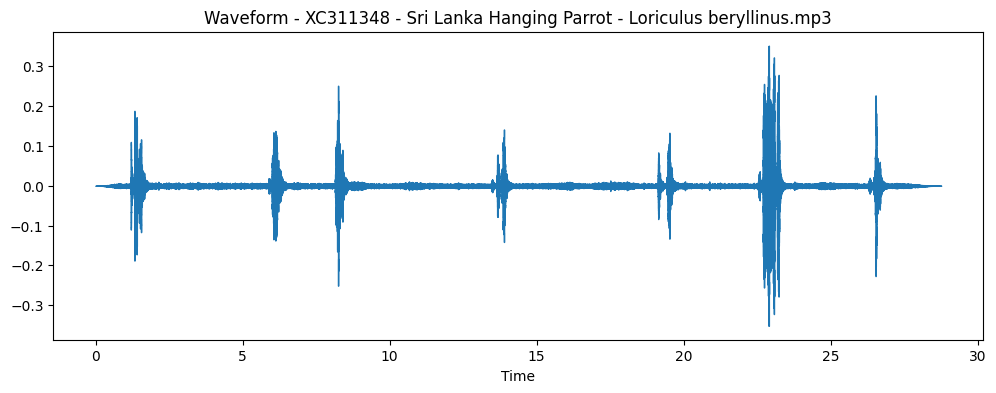

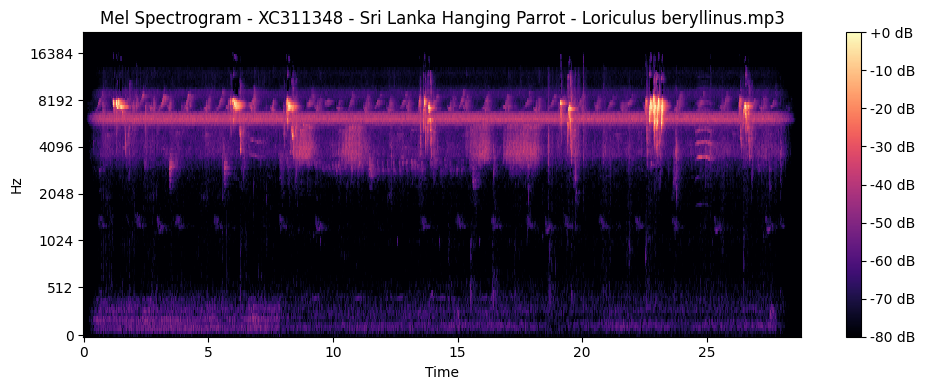

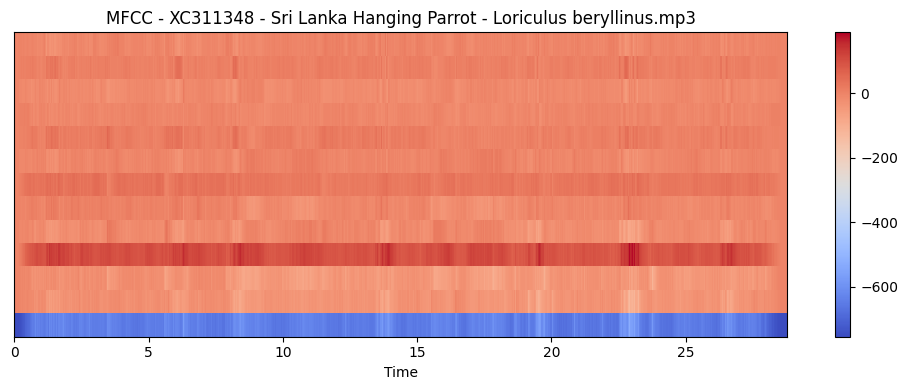

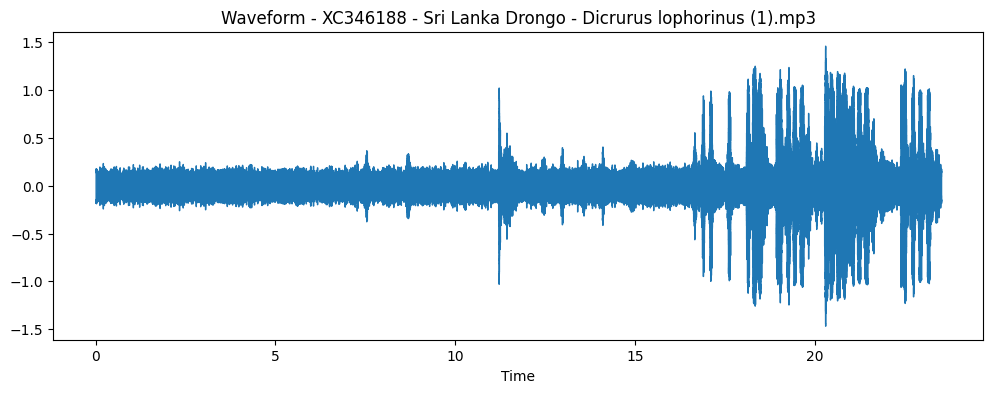

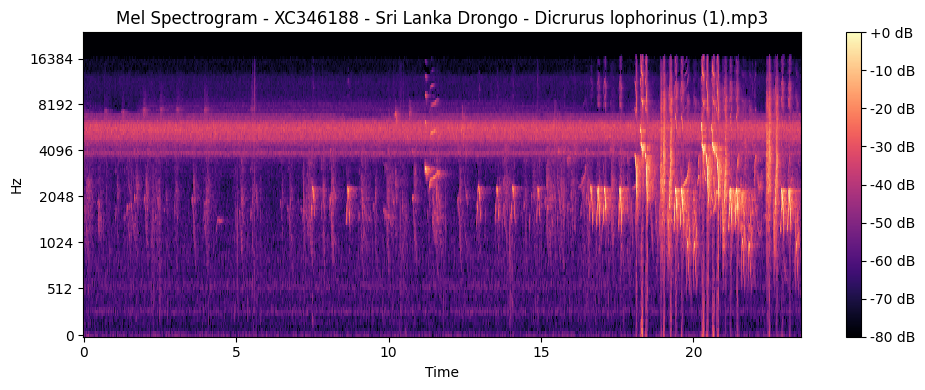

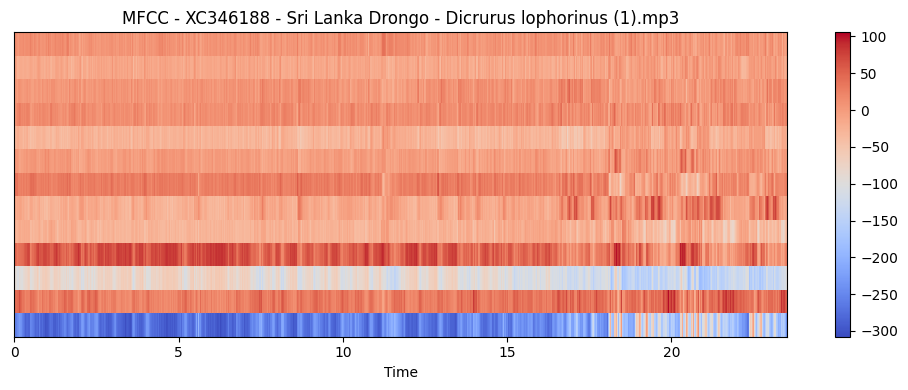

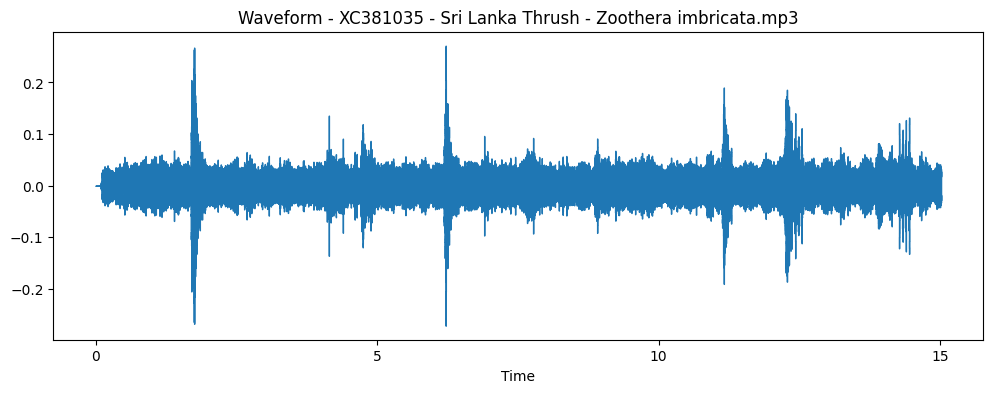

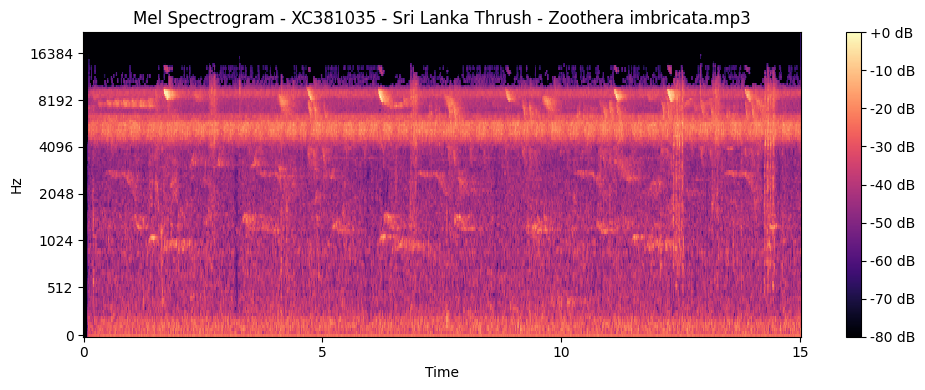

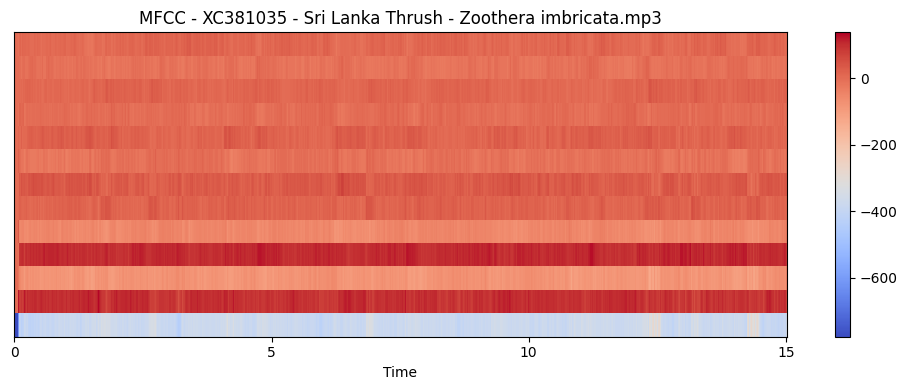

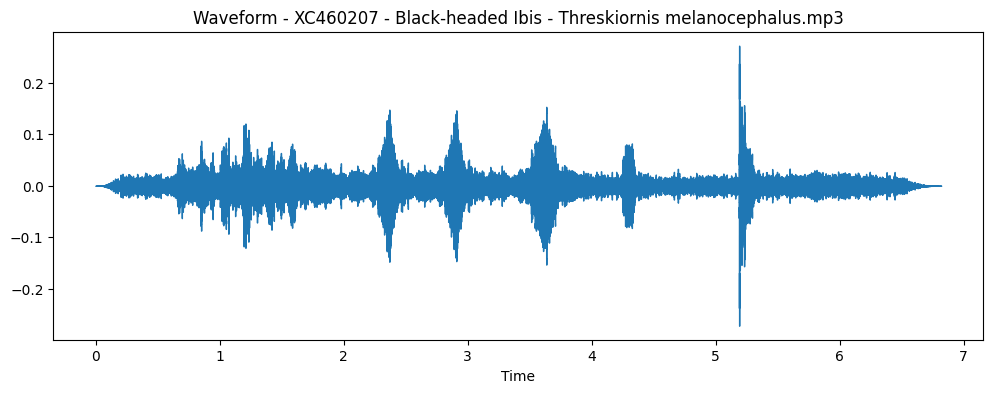

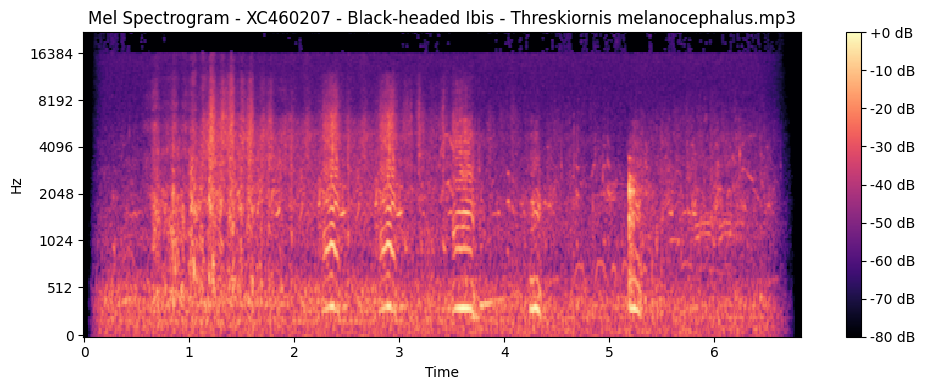

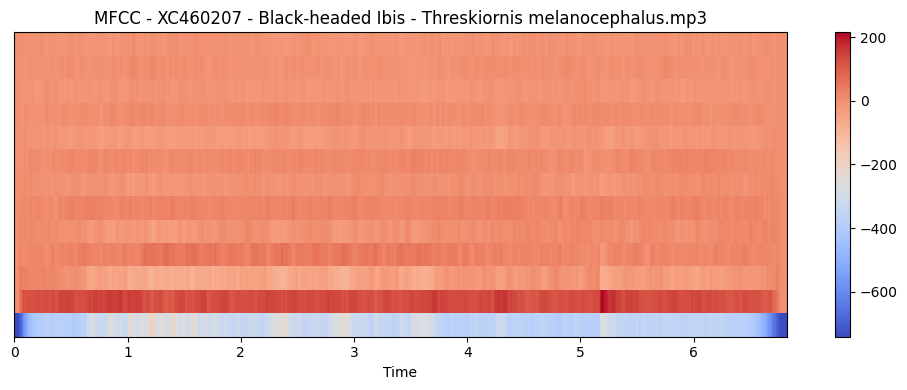

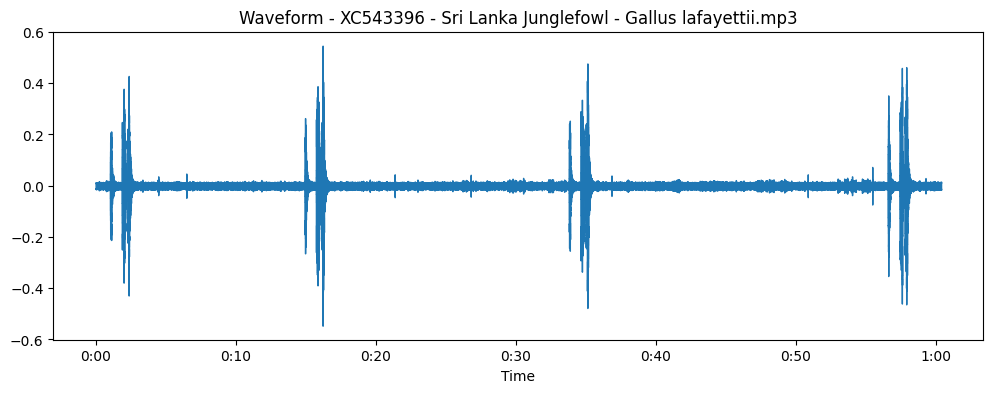

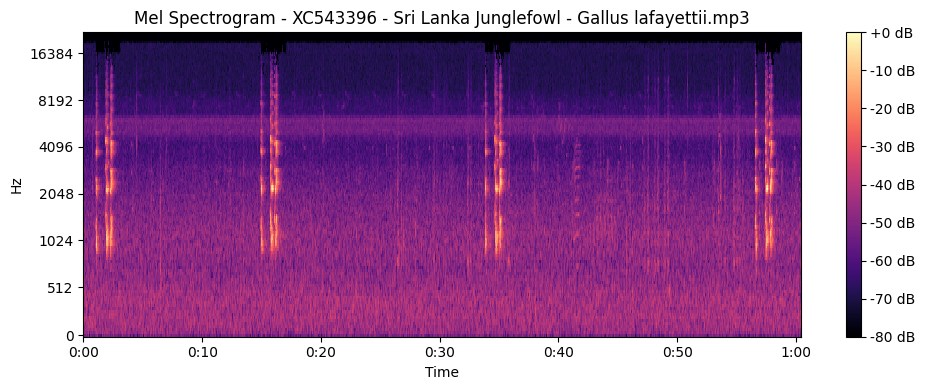

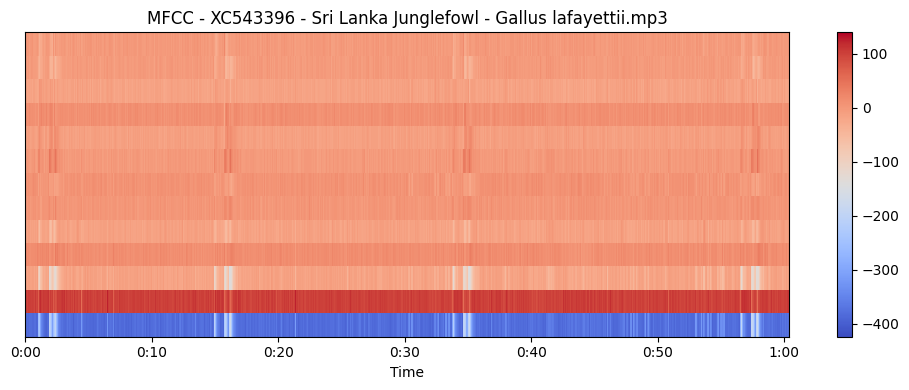

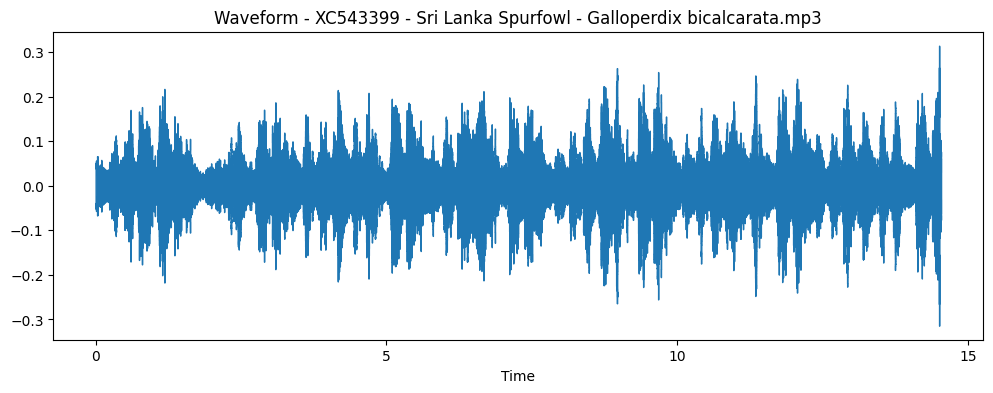

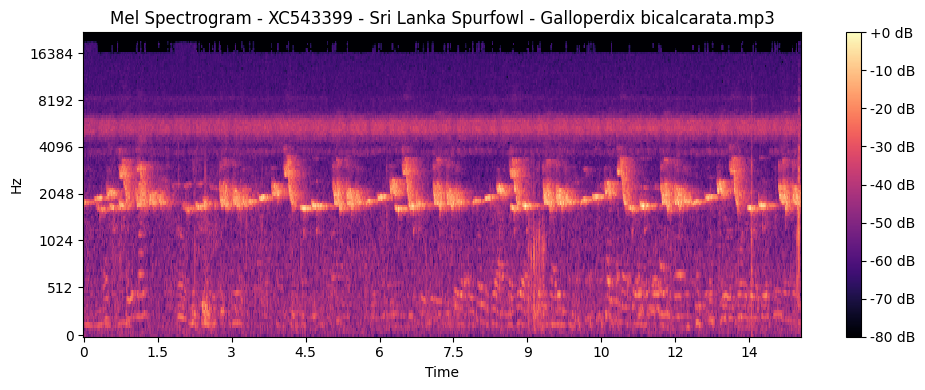

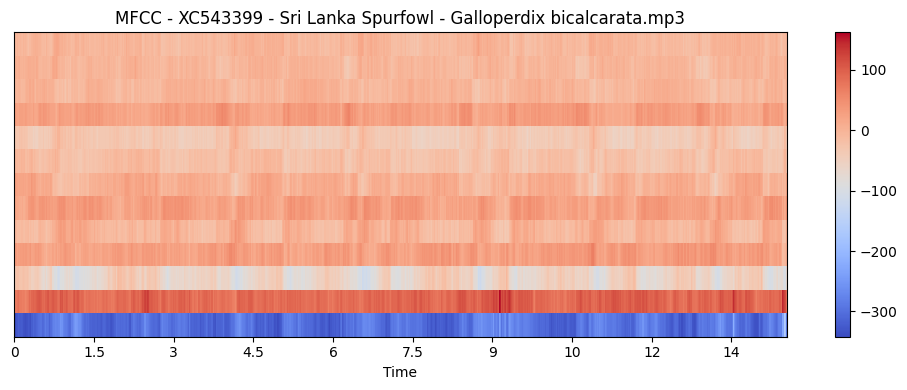

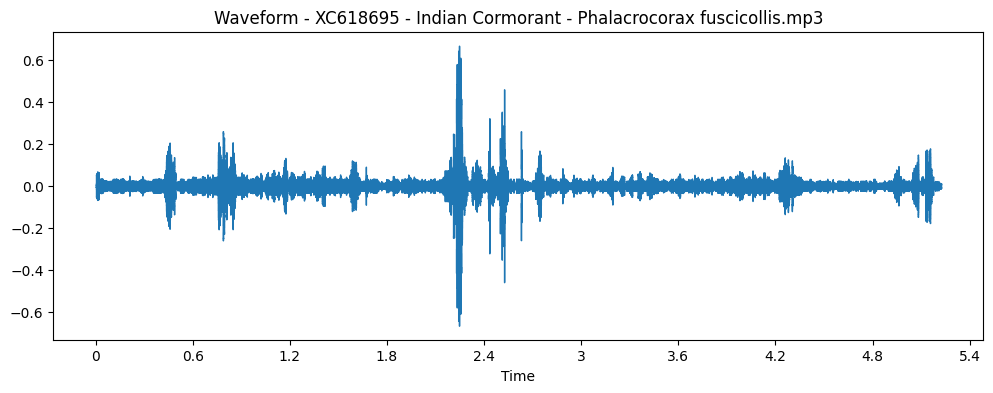

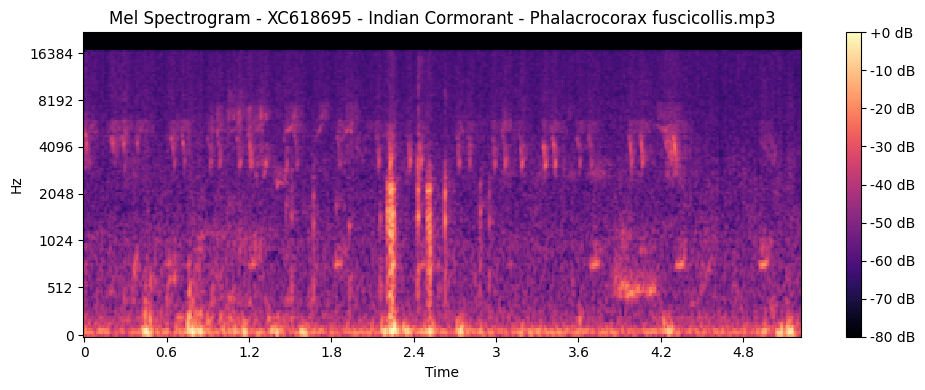

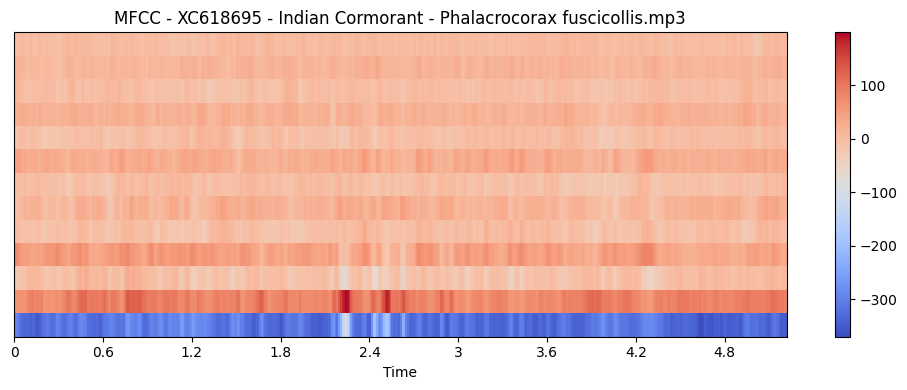

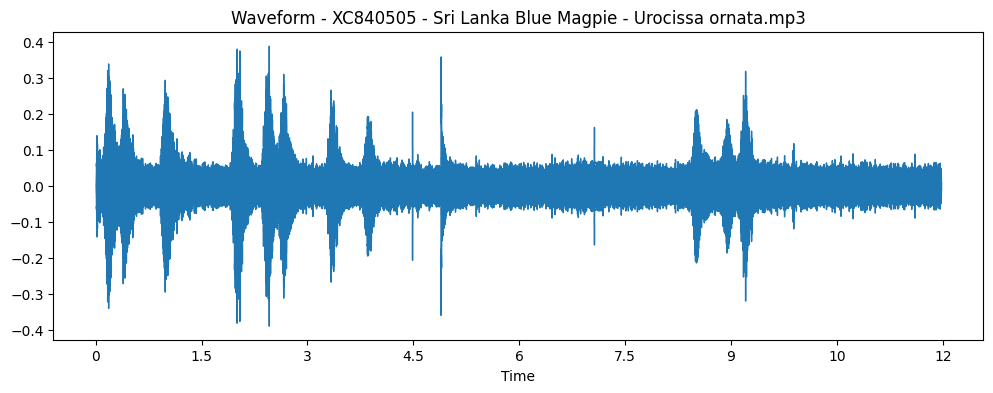

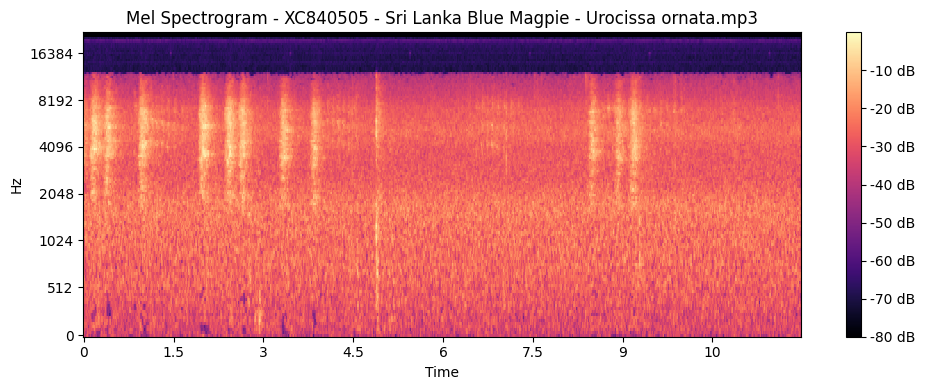

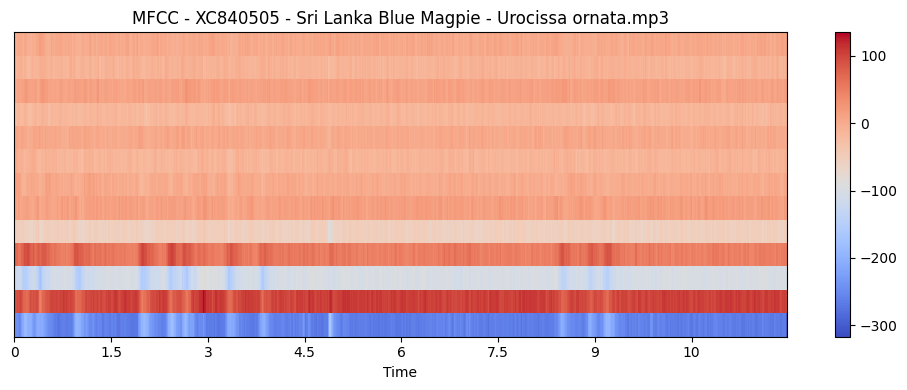

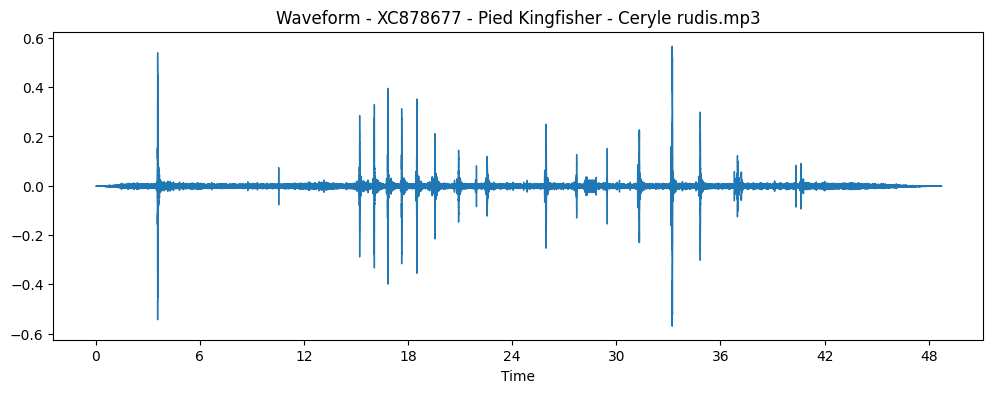

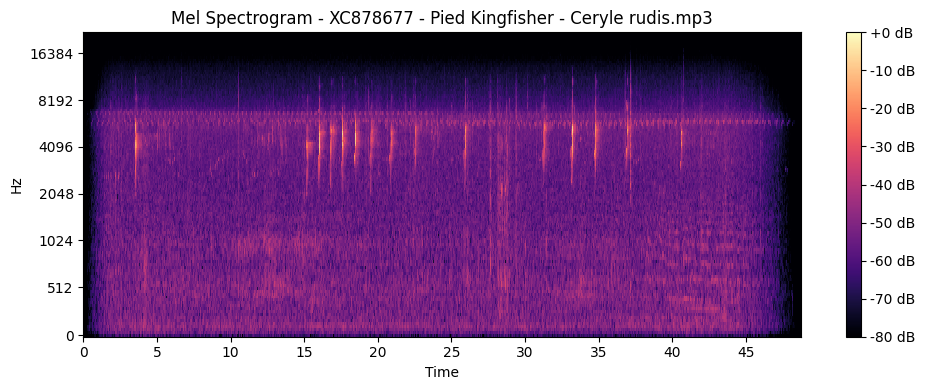

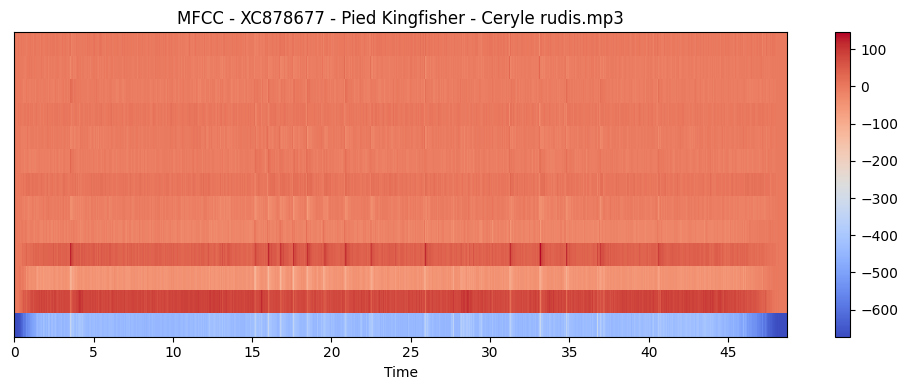

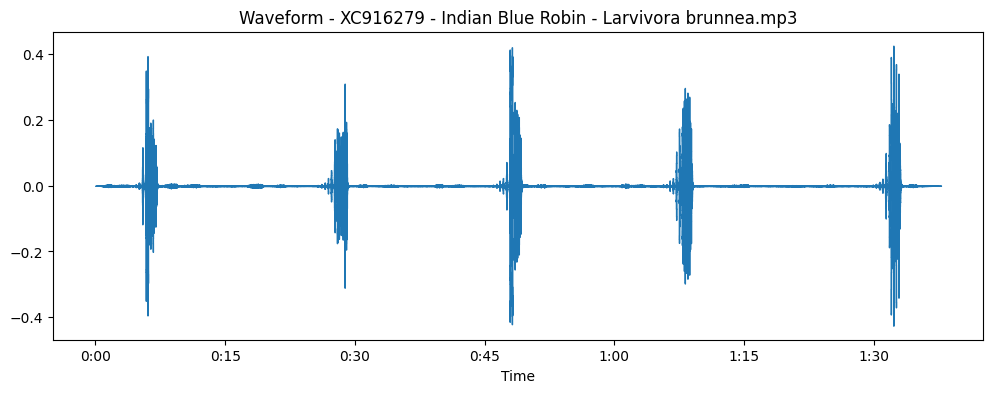

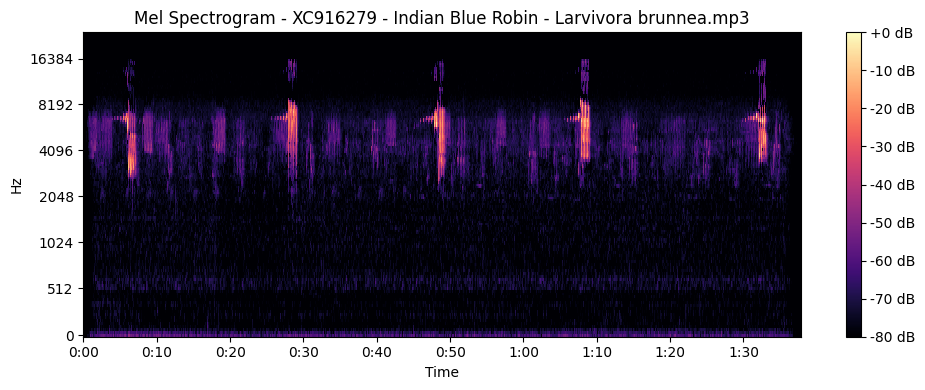

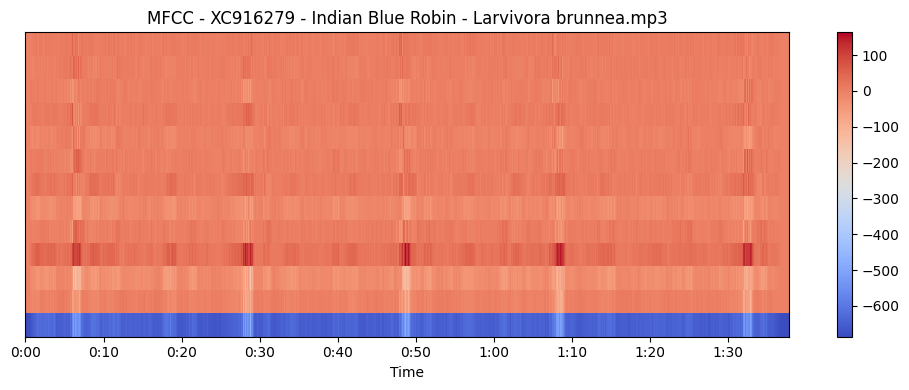

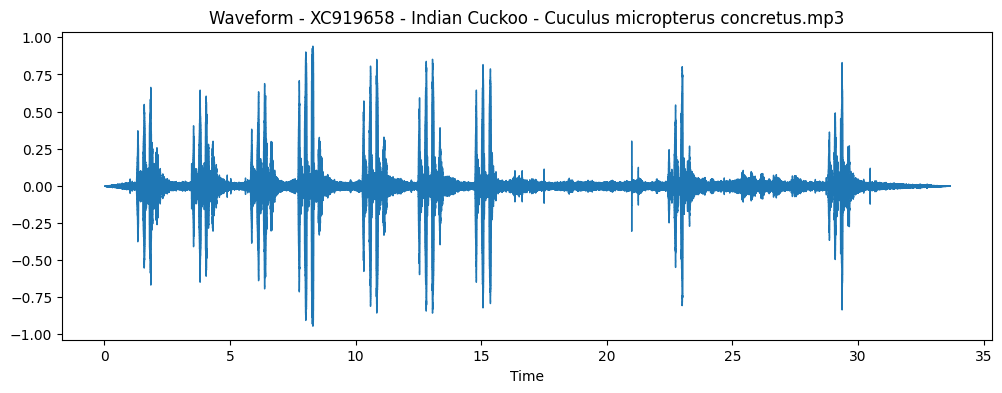

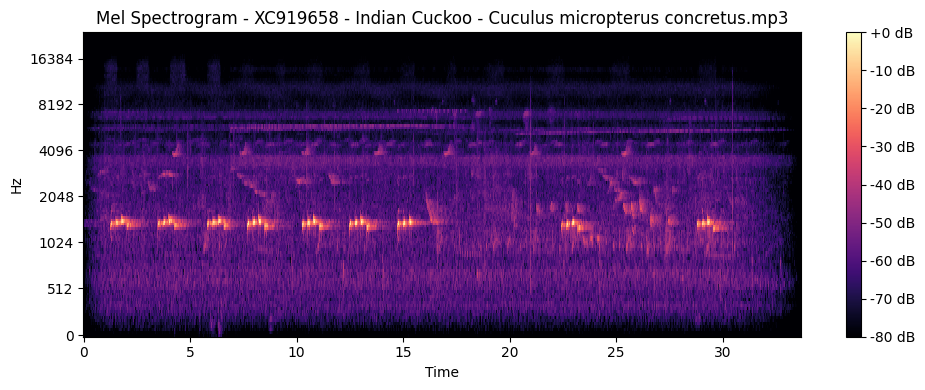

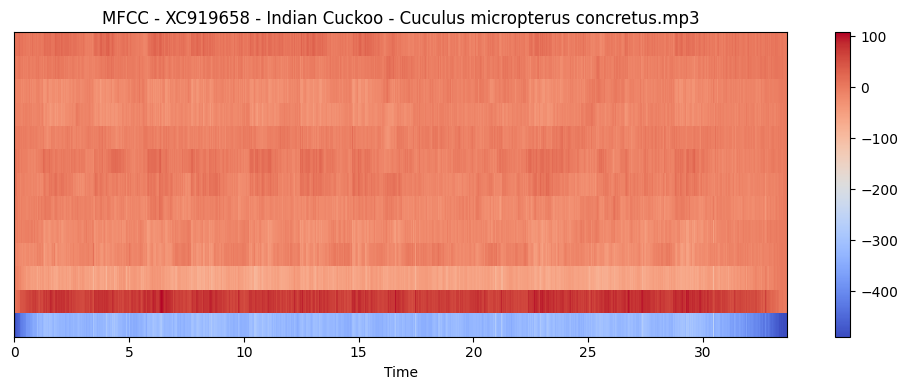

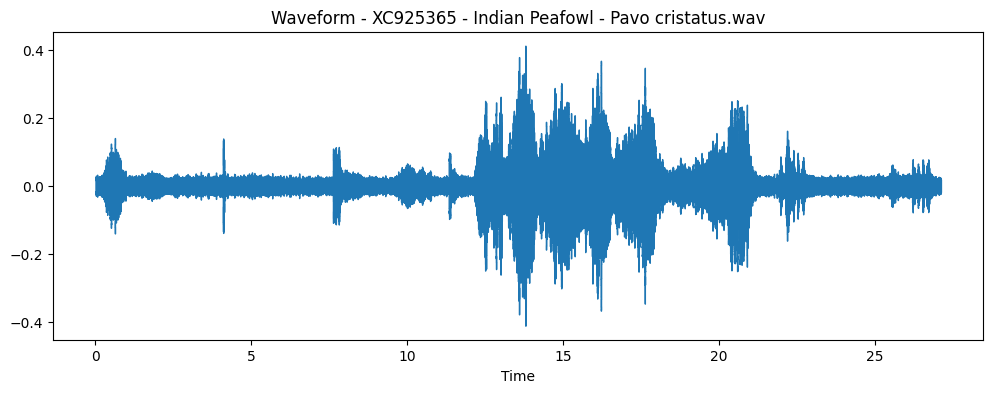

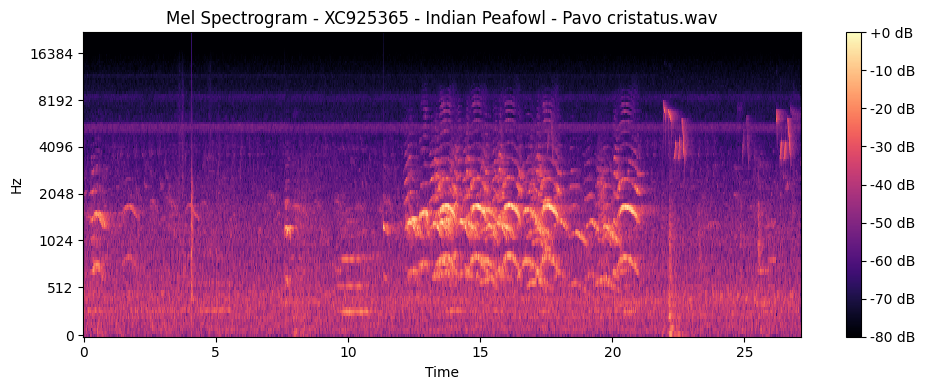

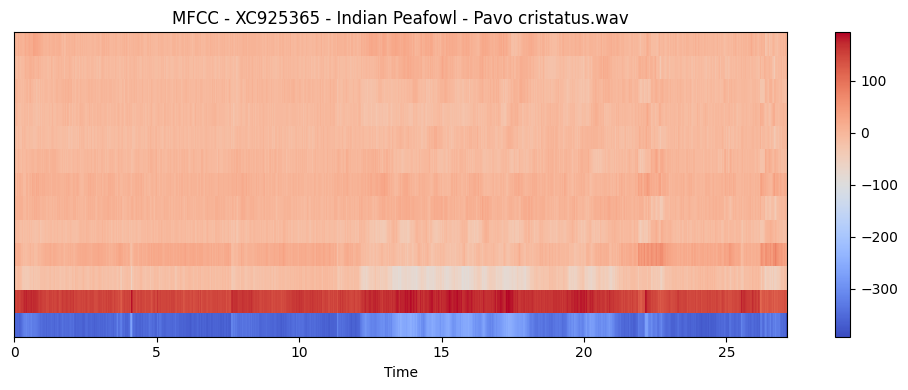

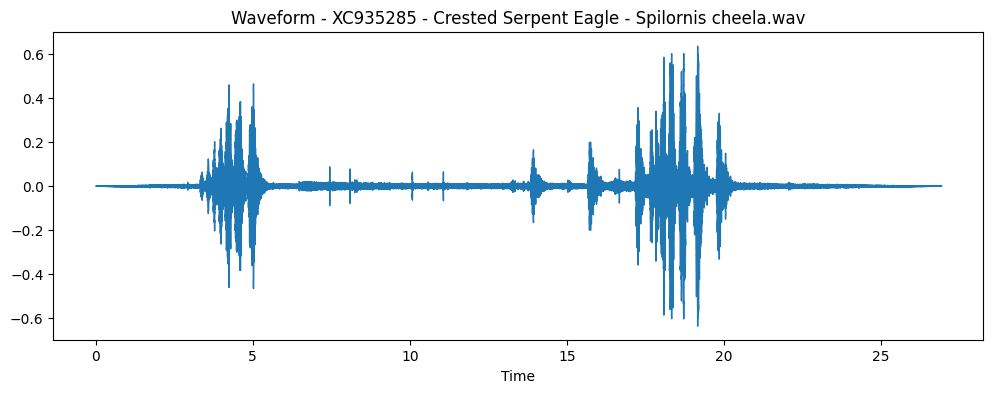

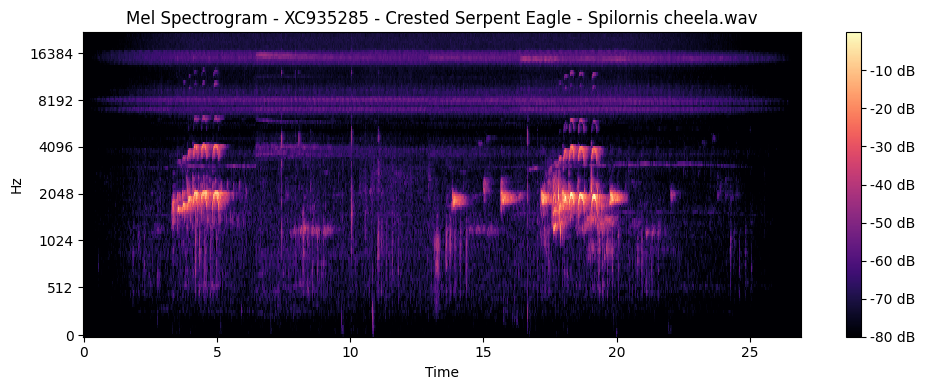

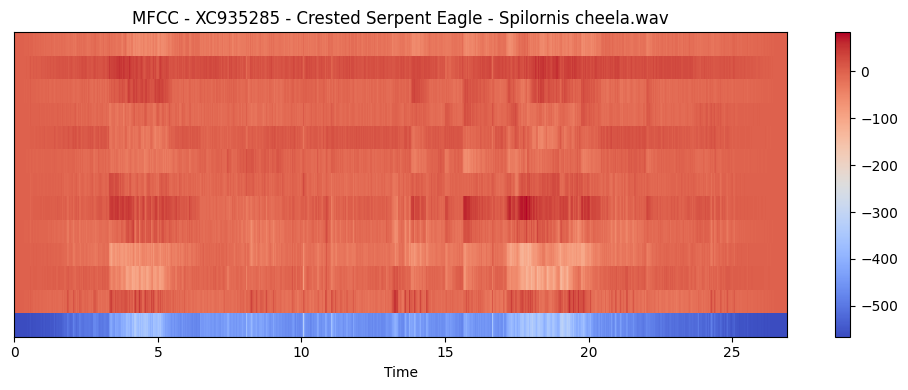

['Sri Lanka Grey Hornbill', 'Sri Lanka Wood Pigeon', 'Sri Lanka Hanging Parrot', 'Sri Lanka Drongo', 'Sri Lanka Thrush', 'Black', 'Sri Lanka Junglefowl', 'Sri Lanka Spurfowl', 'Indian Cormorant', 'Sri Lanka Blue Magpie', 'Pied Kingfisher', 'Indian Blue Robin', 'Indian Cuckoo', 'Indian Peafowl', 'Crested Serpent Eagle']


In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# Function to load audio, plot waveform and mel spectrogram
def plot_audio_features(file_path):
    # Load audio file
    y, sr = librosa.load(file_path, sr=None)
    
    # Display waveform
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform - {os.path.basename(file_path)}')
    plt.show()

    # Convert to Mel spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr)

    # Plot the Mel spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
    plt.title(f'Mel Spectrogram - {os.path.basename(file_path)}')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()

    # Extract MFCCs
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    # Plot MFCCs
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, sr=sr, x_axis='time')
    plt.title(f'MFCC - {os.path.basename(file_path)}')
    plt.colorbar()
    plt.tight_layout()
    plt.show()

# Path to your audio files
audio_dir = r'C:\Users\HP\Downloads\bird sounds'
labels = []  # Initialize labels list

# Loop through each audio file in the directory
for filename in os.listdir(audio_dir):
    if filename.endswith('.mp3') or filename.endswith('.wav'):
        file_path = os.path.join(audio_dir, filename)
        plot_audio_features(file_path)  # Call the plotting function
        
        # Labeling can be modified based on your filename structure
        label = filename.split('-')[1].strip() if '-' in filename else filename  # Adjust this as necessary
        labels.append(label)

# You can print the labels to check
print(labels)



In [3]:
# Extract additional features
def extract_features(y, sr):
    # MFCCs
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    
    # Chroma features
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    
    # Mel Spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    
    # Spectral contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    
    # Zero-crossing rate
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    
    # Combine all features into a single array
    features = np.hstack([mfcc.mean(axis=1), chroma.mean(axis=1), mel_spectrogram.mean(axis=1), 
                           spectral_contrast.mean(axis=1), zero_crossing_rate.mean(axis=1)])
    return features


In [4]:
# Create a DataFrame to hold features and labels
data = []

for filename in os.listdir(audio_dir):
    if filename.endswith('.mp3') or filename.endswith('.wav'):
        file_path = os.path.join(audio_dir, filename)
        y, sr = librosa.load(file_path, sr=None)
        features = extract_features(y, sr)
        
        # Extract the label
        label = filename.split('-')[1].strip() if '-' in filename else filename
        data.append(features.tolist() + [label])  # Append features and label

# Create a DataFrame
df = pd.DataFrame(data, columns=[f'feature_{i}' for i in range(features.shape[0])] + ['label'])
print(df)

     feature_0   feature_1   feature_2   feature_3  feature_4  feature_5  \
0  -368.385345   85.991676 -128.203781  -18.721779   1.003484 -31.855295   
1  -220.538055  129.936295  -56.443039   26.577000 -17.591808   6.375623   
2  -645.609436  -34.870674  -38.472435   97.601227 -15.379351  -6.159764   
3  -230.190369   33.724823 -100.052368   48.213932 -25.602005  -5.613298   
4  -379.028595   95.792358  -79.349037  103.208435 -52.449444  18.800850   
5  -354.063660  128.437714  -33.261494   30.191891  -1.669049  21.106607   
6  -368.256866  100.758759  -23.343363   14.894914 -13.849024   4.210034   
7  -298.888153   92.625015  -60.046127   29.927603  -2.141092  28.549257   
8  -315.116882   90.308868   -6.691657   45.079487  -3.013593  18.082771   
9  -252.630264   99.273727 -107.936470   57.528816 -54.449718  14.753297   
10 -445.062012   76.064835  -48.229748   42.031799 -16.584681  -9.976347   
11 -637.141846   -4.542379  -28.030197   32.839161   4.836168 -16.142120   
12 -330.8331

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# Split the dataset
X = df.drop('label', axis=1).values
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)



In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0



C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

In [7]:
import numpy as np
import librosa

# Load the new audio file
new_file_path = r'C:\Users\user\OneDrive\Desktop\bird sounds\XC618695 - Indian Cormorant - Phalacrocorax fuscicollis.mp3'
y_new, sr_new = librosa.load(new_file_path, sr=None)

#Extract features
file_path = os.path.join(audio_dir, new_file_path)
features = extract_features(y_new, sr_new)

# Extract MFCC features (or any other features you used)
#mfcc_new = librosa.feature.mfcc(y=y_new, sr=sr_new, n_mfcc=13)
#mfcc_new_mean = np.mean(mfcc_new.T, axis=0).reshape(1, -1)  # Reshape for the model
features = features.reshape(1,-1)
print(features.shape)

# Make a prediction using the trained model
predicted_class = model.predict(features)

# Get the predicted class name directly (no need to convert to index)
predicted_class_name = predicted_class[0]  # This should be the class name
print("Predicted class name:", predicted_class_name)


(1, 161)
Predicted class name: 11
